In [170]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter

In [171]:
os.chdir('C:\\Projects\\ature\\net_logs')

In [172]:
file = pd.read_csv('chkDRIVEunet.tar-TRAIN.csv', index_col='TYPE')
file1 = file.query('TYPE==1')

In [173]:
T = np.arange(file1['F1'].shape[0])

### Validation Precision-Recall

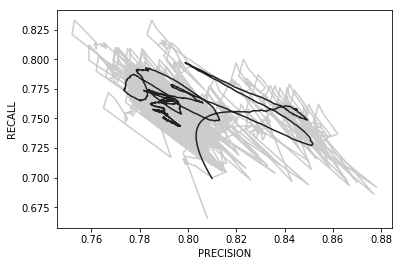

In [174]:
prec_hat=savgol_filter(file1['PRECISION'], 111, 3)
rec_hat=savgol_filter(file1['RECALL'], 111, 3)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.plot(file1['PRECISION'],file1['RECALL'], color='#cccccc')
plt.plot(prec_hat,rec_hat, color='#222222')
plt.show()

### Validation F1 Score

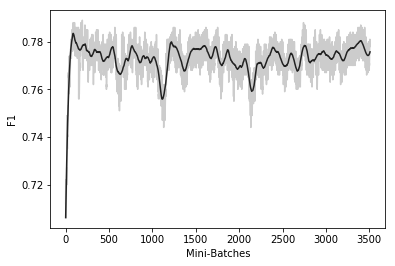

In [159]:
f1hat = savgol_filter(file1['F1'], 151, 3)
savgol_filter(file1['F1'], 151, 3)
plt.xlabel('Mini-Batches')
plt.ylabel('F1')
plt.plot(T,file1['F1'], color='#cccccc')
plt.plot(T,f1hat, color='#222222')
plt.show()

### Validation Accuracy

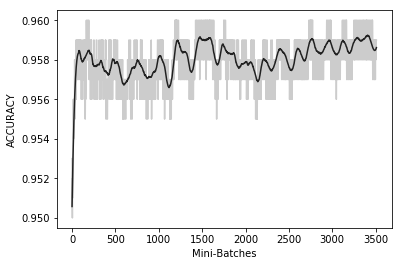

In [160]:
acchat=savgol_filter(file1['ACCURACY'], 151, 3)
plt.xlabel('Mini-Batches')
plt.ylabel('ACCURACY')
plt.plot(T,file1['ACCURACY'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### Training F1 Score

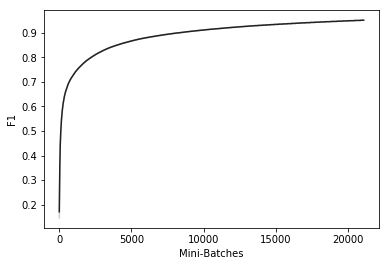

In [162]:
file2 = file.query('TYPE==0')
acchat=savgol_filter(file2['F1'], 11, 1)
T = np.arange(file1['F1'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('F1')
plt.plot(T,file1['F1'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### Training Accuracy

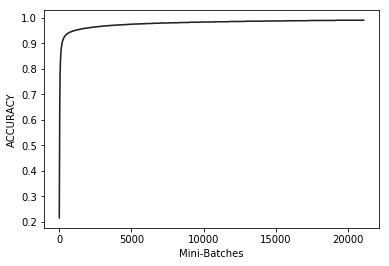

In [164]:
file2 = file.query('TYPE==0')
acchat=savgol_filter(file2['ACCURACY'], 11, 1)
T = np.arange(file1['ACCURACY'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('ACCURACY')
plt.plot(T,file1['ACCURACY'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### TEST 

In [175]:
file_test = pd.read_csv('chkDRIVEunet.tar-TEST.csv', index_col='TYPE')
file1 = file_test.query('TYPE==1')

### TEST F1 Score

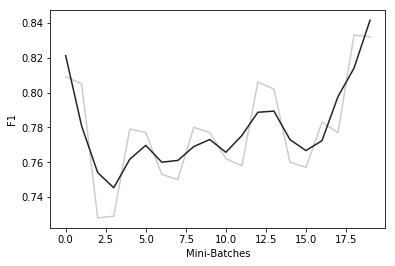

In [188]:
f1hat = savgol_filter(file_test['F1'], 3, 1)
T = np.arange(file_test['F1'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('F1')
plt.plot(T,file_test['F1'], color='#cccccc')
plt.plot(T,f1hat, color='#222222')
plt.show()

In [189]:
T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])